In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from boto3_utilities import *

%matplotlib inline

In [2]:
BUCKET_NAME = "co2-data-keisuke-nakata"

In [3]:
df_half = read_s3_file(BUCKET_NAME, "dt=2022/02/23/19-26-17.csv")
df_half = df_half[109:169]
df_half = df_half.reset_index()
df_half['dt'] = pd.to_datetime(df_half['dt'])
base = df_half.at[0, 'dt']
df_half['elapsed'] = df_half['dt'] - base

df_half.at[0, 'co2'] = 900
df_half.at[0, 'temp'] = 26.0
df_half.head()

,index,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan,elapsed
0,109,2022-02-23 19:44:39,0,26.00,21.26,1016.59,900,2,0,close,0,on,on,on,0 days 00:00:00
1,110,2022-02-23 19:44:49,0,26.20,20.91,1016.59,888,3,0,close,0,on,on,on,0 days 00:00:10
2,111,2022-02-23 19:44:59,0,26.15,21.11,1016.55,877,2,0,close,0,on,on,on,0 days 00:00:20
3,112,2022-02-23 19:45:09,0,26.17,21.41,1016.61,877,4,0,close,0,on,on,on,0 days 00:00:30
4,113,2022-02-23 19:45:19,0,26.19,21.37,1016.60,872,6,0,close,0,on,on,on,0 days 00:00:40


In [4]:
df_full = read_s3_file(BUCKET_NAME, "dt=2022/02/23/19-56-31.csv")
df_full = df_full[153:160]
df_full = df_full.reset_index()
df_full['dt'] = pd.to_datetime(df_full['dt'])
base = df_full.at[0, 'dt']
df_full['elapsed'] = df_full['dt'] - base

df_full.at[0, 'co2'] = 900
df_full.at[0, 'temp'] = 26.0
df_full.head()

,index,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan,elapsed
0,153,2022-02-23 20:22:15,0,26.00,16.15,1016.78,900,2,0,close,0,on,on,on,0 days 00:00:00
1,154,2022-02-23 20:22:25,0,24.90,16.54,1016.78,881,3,0,close,0,on,on,on,0 days 00:00:10
2,155,2022-02-23 20:22:35,0,24.06,17.23,1016.77,735,6,0,close,0,on,on,on,0 days 00:00:20
3,156,2022-02-23 20:22:45,0,23.62,18.91,1016.75,647,2,0,close,0,on,on,on,0 days 00:00:30
4,157,2022-02-23 20:22:55,0,23.34,18.36,1016.81,597,4,0,close,0,on,on,on,0 days 00:00:40


In [5]:
df_half_Cir_Door = read_s3_file(BUCKET_NAME, "dt=2022/02/23/20-32-20.csv")
df_half_Cir_Door = df_half_Cir_Door[174:234]
df_half_Cir_Door = df_half_Cir_Door.reset_index()
df_half_Cir_Door['dt'] = pd.to_datetime(df_half_Cir_Door['dt'])
base = df_half_Cir_Door.at[0, 'dt']
df_half_Cir_Door['elapsed'] = df_half_Cir_Door['dt'] - base

df_half_Cir_Door.at[0, 'co2'] = 900
df_half_Cir_Door.at[0, 'temp'] = 26.0
df_half_Cir_Door.at[1, 'temp'] = 25.9
df_half_Cir_Door.at[2, 'temp'] = 25.7
df_half_Cir_Door.at[3, 'temp'] = 25.8
df_half_Cir_Door.at[4, 'temp'] = 25.8
df_half_Cir_Door.at[5, 'temp'] = 25.7
df_half_Cir_Door.at[6, 'temp'] = 25.8
df_half_Cir_Door.head()

,index,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan,elapsed
0,174,2022-02-23 21:01:33,0,26.0,19.75,1016.92,900,4,0,close,0,on,on,on,0 days 00:00:00
1,175,2022-02-23 21:01:43,0,25.9,19.66,1016.93,871,6,0,close,0,on,on,on,0 days 00:00:10
2,176,2022-02-23 21:01:53,0,25.7,19.72,1016.91,842,6,0,close,0,on,on,on,0 days 00:00:20
3,177,2022-02-23 21:02:03,0,25.8,20.04,1016.88,807,6,0,close,0,on,on,on,0 days 00:00:30
4,178,2022-02-23 21:02:13,0,25.8,19.71,1016.92,778,3,0,close,0,on,on,on,0 days 00:00:40


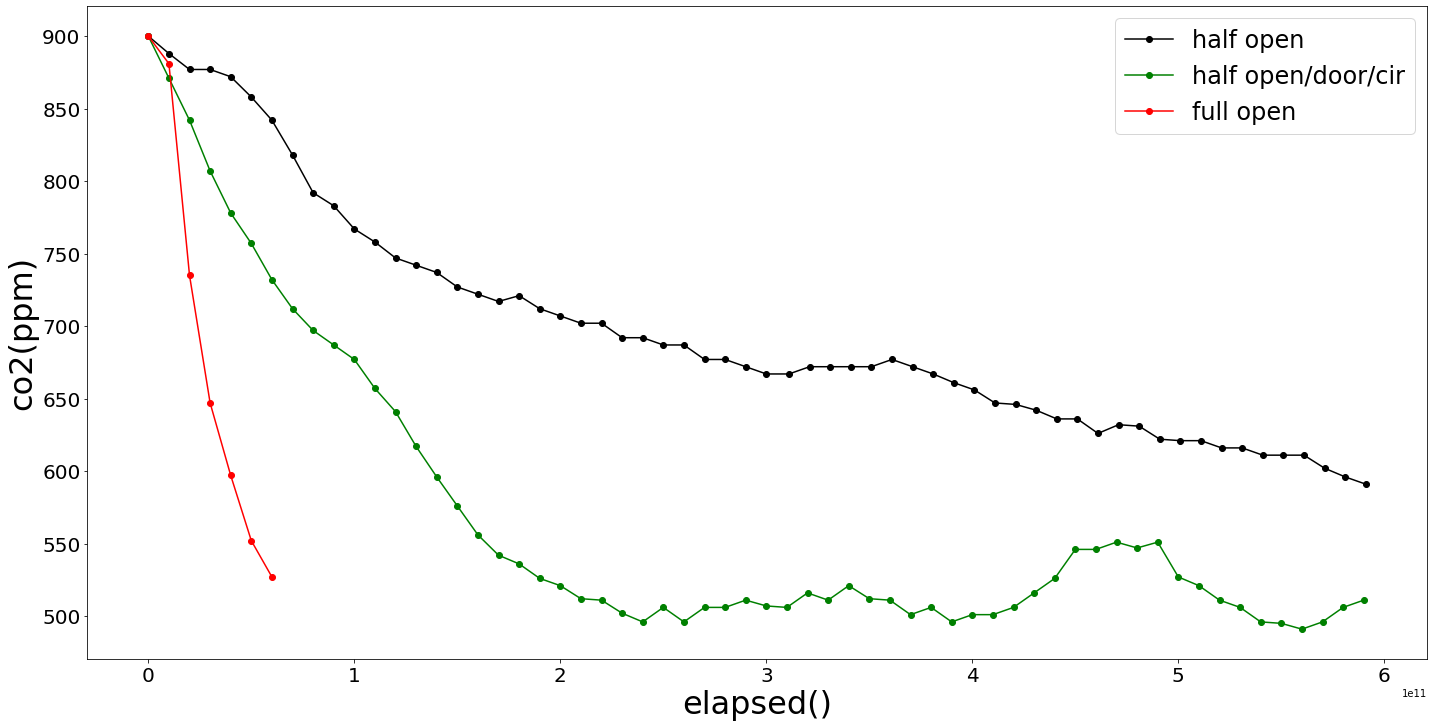

In [10]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(1,1,1)

ax.plot(df_half['elapsed'], df_half['co2'], c='black', label='half open', marker="o")
ax.plot(df_half_Cir_Door['elapsed'], df_half_Cir_Door['co2'], c='green', label='half open/door/cir', marker="o")
ax.plot(df_full['elapsed'], df_full['co2'], c='red', label='full open', marker="o")

ax.set_xlabel('elapsed()', fontsize=32)
ax.set_ylabel('co2(ppm)', fontsize=32)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=24)

fig.show()

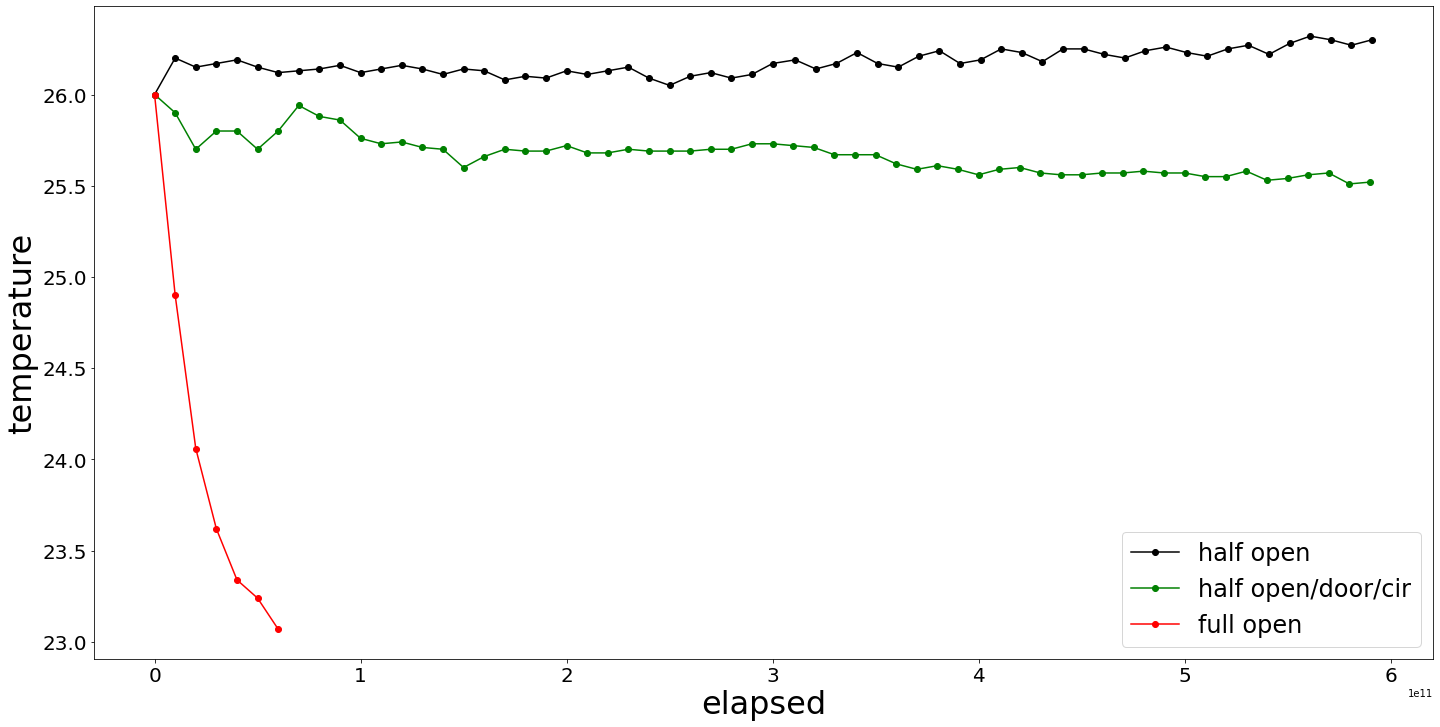

In [11]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(1,1,1)

ax.plot(df_half['elapsed'], df_half['temp'], c='black', label='half open', marker="o")
ax.plot(df_half_Cir_Door['elapsed'], df_half_Cir_Door['temp'], c='green', label='half open/door/cir', marker="o")
ax.plot(df_full['elapsed'], df_full['temp'], c='red', label='full open', marker="o")

ax.set_xlabel('elapsed', fontsize=32)
ax.set_ylabel('temperature', fontsize=32)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=24)

fig.show()